In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline

from tqdm import tqdm

gold_yellow = "#FFC000"

In [2]:
df = gpd.read_file("../data/master.geojson")

In [3]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
0,01004,01,84,882724.0,6542583.0,Ambérieu-en-Bugey,13.7,13460.0,481.386634,227.390682,...,585.373385,501.891964,676.571427,95.057840,342.181840,405.256373,390.767916,45.879279,Lyon,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ..."
1,01007,01,84,882682.0,6548067.0,Ambronay,13.5,2563.0,479.423210,232.793303,...,583.044624,497.657430,674.146914,98.542071,337.432535,408.804303,388.531487,48.741451,Lyon,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ..."
2,01014,01,84,906407.0,6580780.0,Arbent,13.5,3281.0,491.910607,269.530737,...,592.430505,489.484950,682.573590,138.224859,297.286527,448.270671,399.360905,87.894148,Lyon,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ..."
3,01024,01,84,866161.0,6578890.0,Attignat,12.9,3329.0,453.855171,261.397017,...,555.654896,463.493880,646.263640,111.697209,320.269383,417.976502,361.838430,63.123904,Lyon,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ..."
4,01025,01,84,849782.0,6581485.0,Bâgé-la-Ville,13.0,3142.0,437.452133,263.172045,...,539.526669,450.918833,630.241338,106.570254,327.904742,408.624114,345.563023,61.578670,Lyon,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ..."


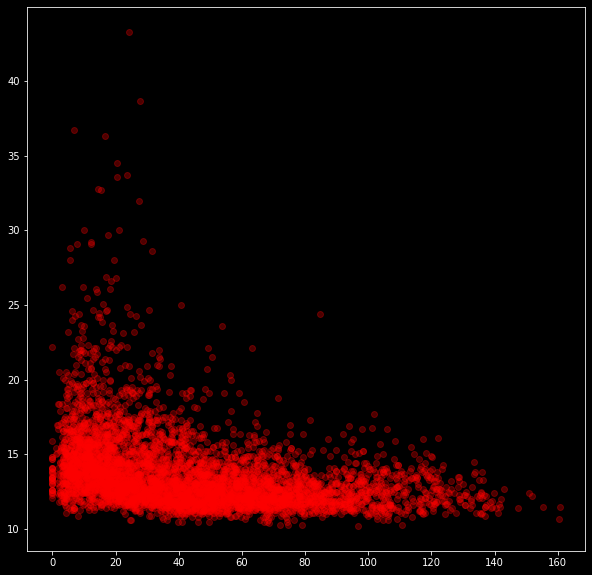

In [4]:
# df_temp = df[df["closest_metropolis"] == "Paris"]
df_temp = df

with plt.style.context("dark_background"):
    plt.figure(figsize=(10, 10))
    plt.scatter(
        df_temp["dist_min"],
        df_temp["net_salary"],
        color="red",
        alpha=.3
    )
    
    plt.show()

In [5]:
len(df["closest_metropolis"].unique())

34

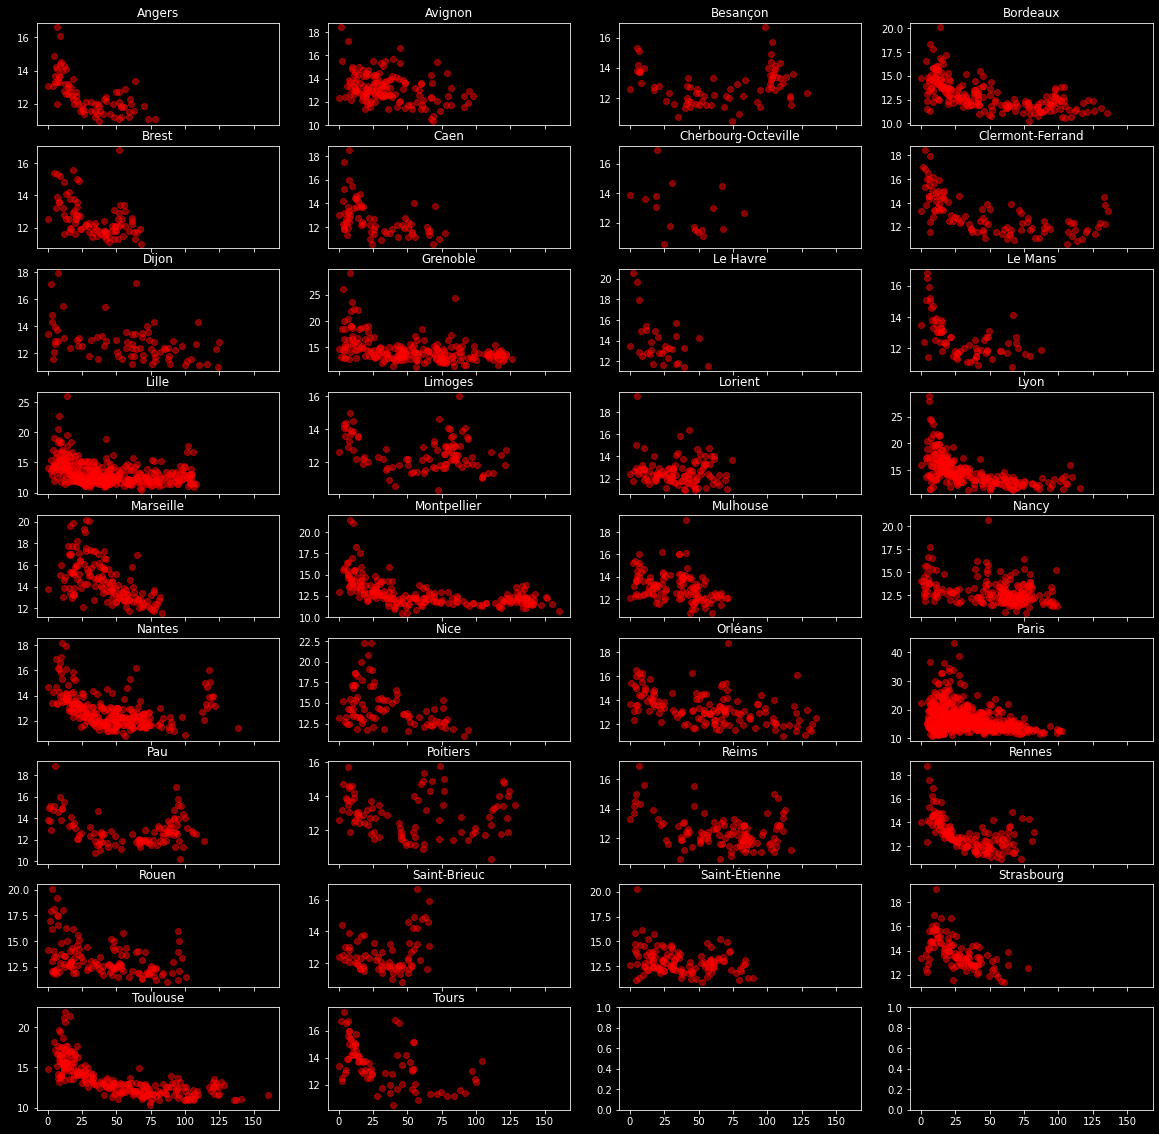

In [6]:

cities = sorted(df["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df[df["closest_metropolis"] == city]
        ax.scatter(
            df_temp["dist_min"],
            df_temp["net_salary"], # / df_temp["net_salary"].max(),
            color="red",
            alpha=.5
        )
        ax.set_title(city)
    plt.savefig("../images/distance_vs_net_salary.png")

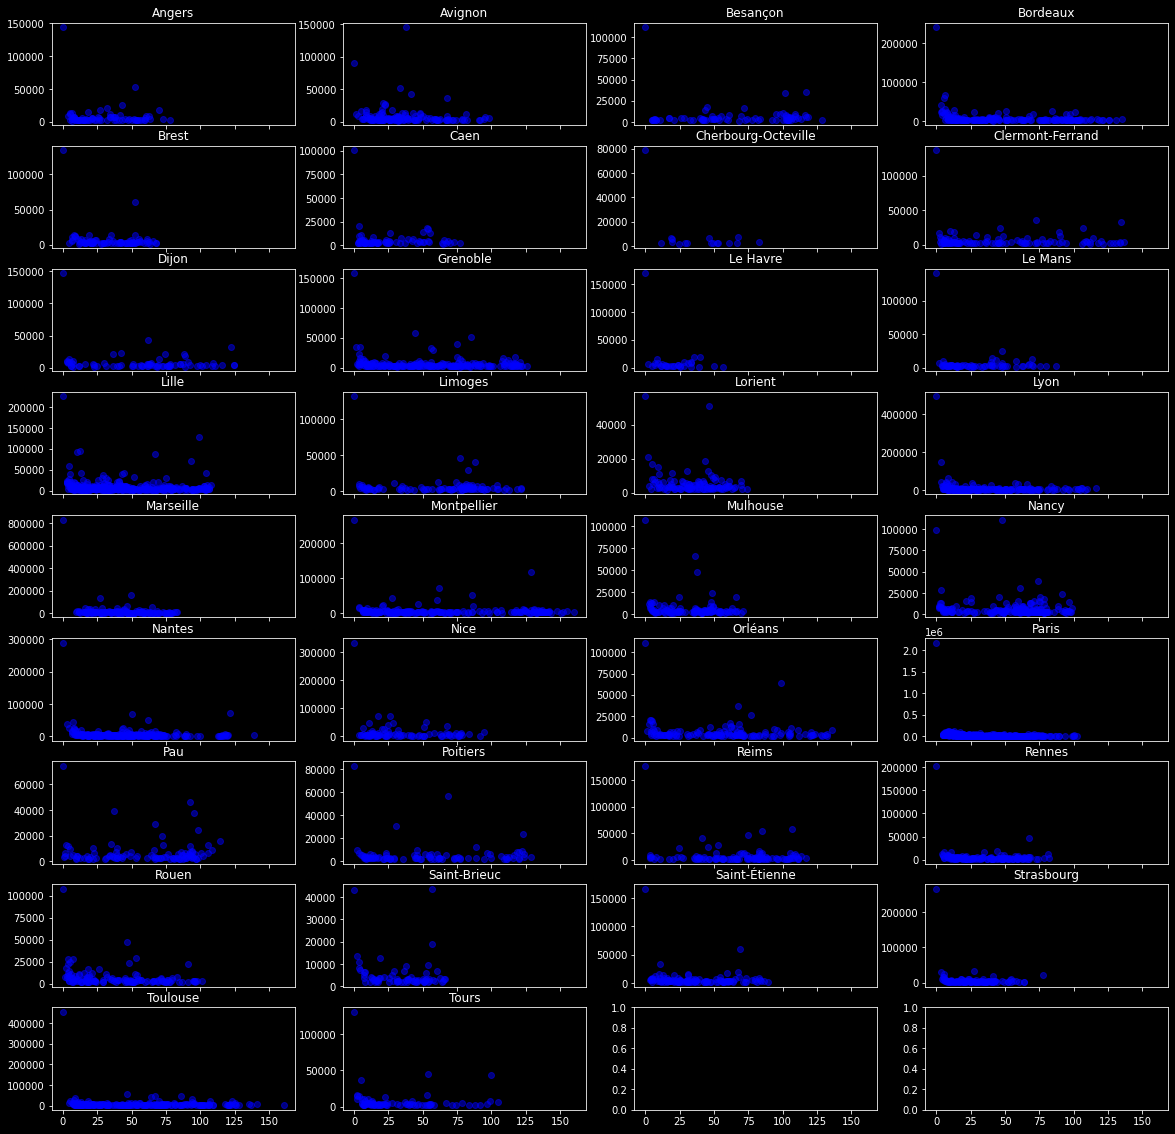

In [7]:
cities = sorted(df["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df[df["closest_metropolis"] == city]
        ax.scatter(
            df_temp["dist_min"],
            df_temp["population"],
            color="blue",
            alpha=.5
        )
        ax.set_title(city)

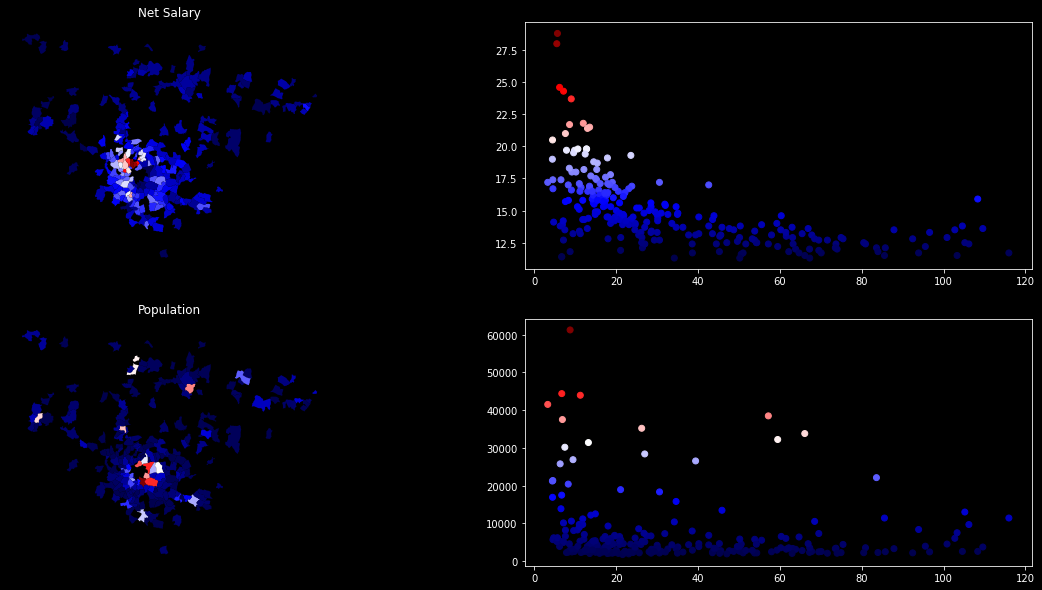

In [21]:
df_temp = df[df["closest_metropolis"] == "Lyon"]
df_temp = df_temp[df_temp["libgeo"]!= "Lyon"]
df_temp = df_temp[df_temp["libgeo"]!= "Villeurbanne"]

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
    df_temp.plot(
        df_temp["net_salary"],
        cmap="seismic",
        ax=axes[0, 0]
    )
    
    df_temp.plot(
        df_temp["population"],
        cmap="seismic",
        ax=axes[1, 0]
    )
    
    axes[0, 1].scatter(
        df_temp["dist_min"],
        df_temp["net_salary"],
        c=df_temp["net_salary"],
        cmap="seismic"
    )
    axes[1, 1].scatter(
        df_temp["dist_min"],
        df_temp["population"],
        c=df_temp["population"],
        cmap="seismic"
        
    )
    axes[0, 0].axis("off")
    axes[0, 0].set_title("Net Salary")
    axes[1, 0].axis("off")
    axes[1, 0].set_title("Population")
    plt.savefig("../images/lyon_study.png")
    

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
4276,82121,82,76,567919.0,6325501.0,Montauban,12.8,56946.0,411.195428,277.086085,...,511.675500,603.303316,591.553961,287.650708,705.954940,46.319872,378.352879,46.319872,Toulouse,"POLYGON ((1.28998 44.03365, 1.29064 44.02966, ..."
4231,81004,81,76,631446.0,6314627.0,Albi,12.9,47267.0,445.918959,213.499603,...,550.907596,618.043913,634.446493,244.472658,672.636306,66.960030,401.051845,66.960030,Toulouse,"POLYGON ((2.12381 43.90092, 2.11965 43.89951, ..."
307,11069,11,76,647381.0,6234976.0,Carcassonne,11.8,44330.0,524.759774,214.409536,...,628.195432,699.013146,709.975046,295.950420,727.682791,85.593700,482.119010,85.593700,Toulouse,"POLYGON ((2.40574 43.22300, 2.40971 43.23002, ..."
4240,81065,81,76,638741.0,6278587.0,Castres,13.1,39907.0,481.530287,209.972917,...,585.787745,654.682312,668.501809,265.878080,696.859382,64.390464,437.747067,64.390464,Toulouse,"POLYGON ((2.27506 43.64352, 2.27440 43.64507, ..."
1170,31149,31,76,565532.0,6280512.0,Colomiers,15.7,37891.0,453.223929,281.932728,...,551.856635,648.273676,629.914129,316.410076,740.998708,8.870856,422.859649,8.870856,Toulouse,"POLYGON ((1.34734 43.63348, 1.34282 43.63303, ..."


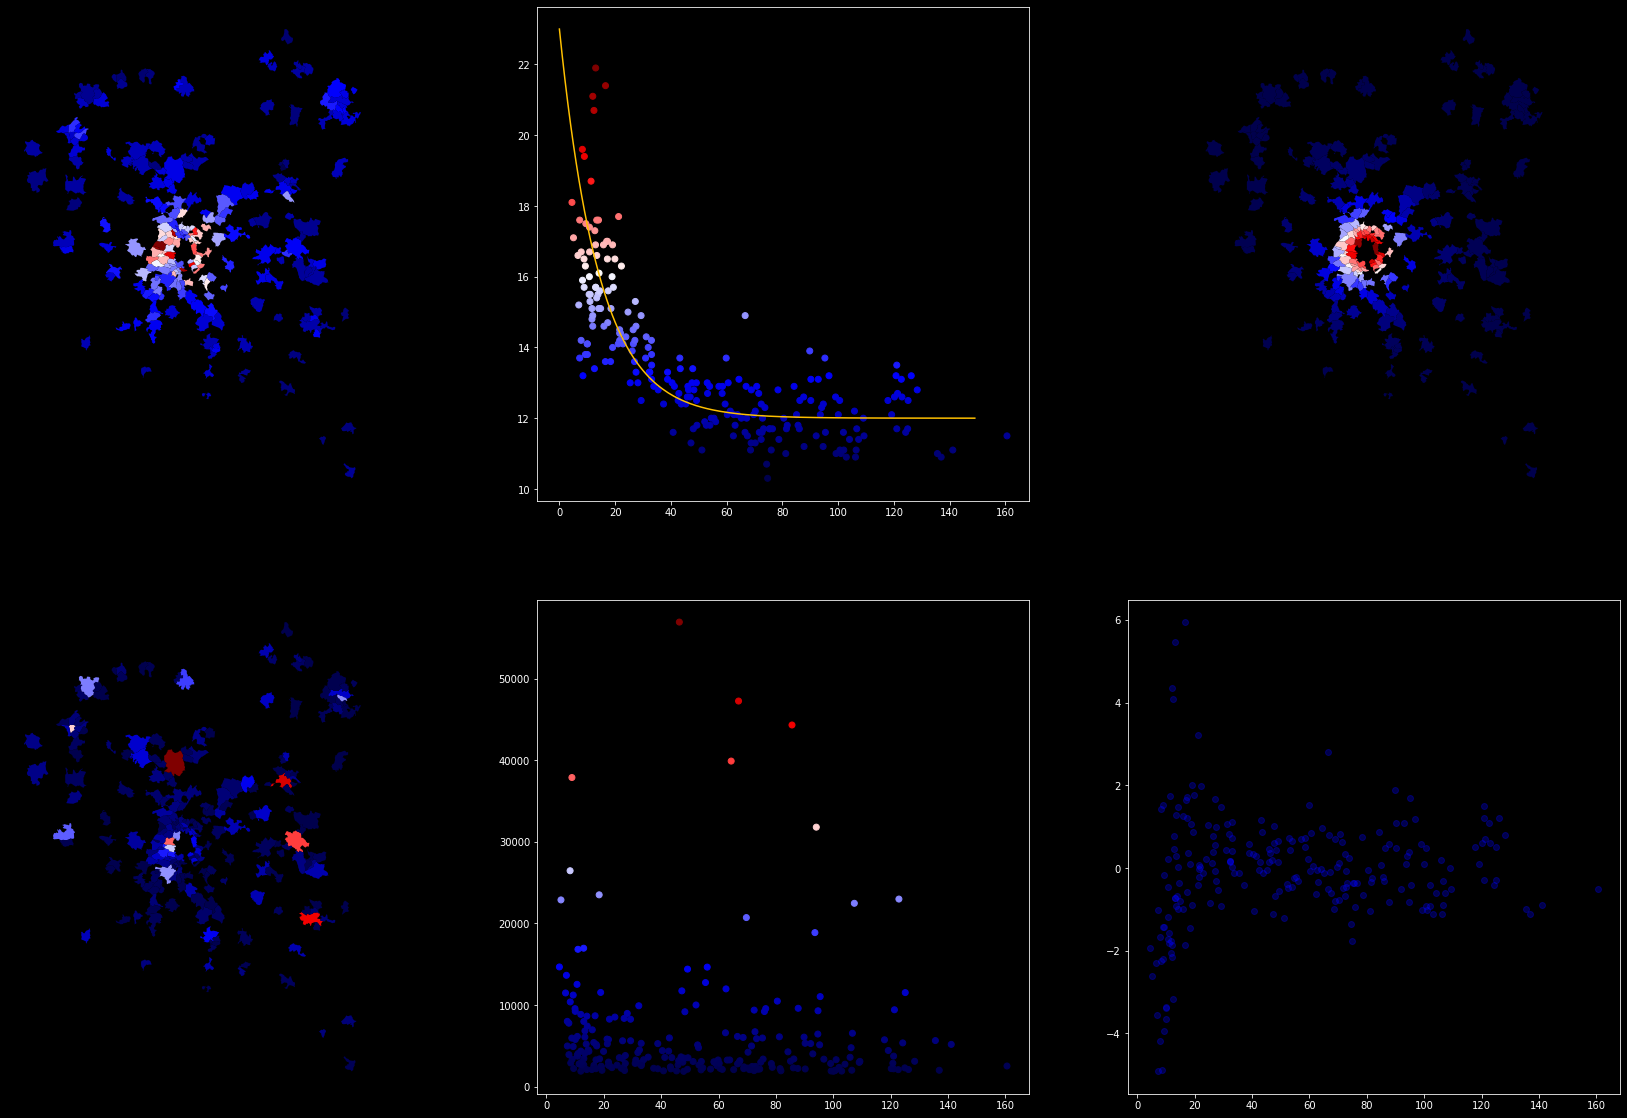

In [9]:
city = "Toulouse"

df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"]!= city]

####### MODEL PARAMETERS #######

alpha = 0.07
x0 = 11
base = 12
rng = np.random.default_rng(1234)

def simulate_net_salary(x):
    return (
        np.exp(- alpha * x) * x0 + base #+ rng.normal(scale=5 * np.exp(- .5 * x) + 1)
    )

################################

xs = np.arange(150)
ys = np.exp(- alpha * xs) * x0 + base

# df_temp = df_temp[df_temp["libgeo"]!= "Villeurbanne"]

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 20))
    df_temp.plot(
        df_temp["net_salary"],
        cmap="seismic",
        ax=axes[0, 0]
    )
    
    df_temp.plot(
        df_temp["population"],
        cmap="seismic",
        ax=axes[1, 0]
    )
    
    axes[0, 1].scatter(
        df_temp["dist_min"],
        df_temp["net_salary"],
        c=df_temp["net_salary"],
        cmap="seismic",
        zorder=-1
    )
    axes[0, 1].plot(
        xs,
        ys,
        c=gold_yellow
    )
    
    axes[1, 1].scatter(
        df_temp["dist_min"],
        df_temp["population"],
        c=df_temp["population"],
        cmap="seismic"
    )
    
    df_temp.plot(
        np.exp(- alpha * df_temp["dist_min"]) * x0 + base,
        ax=axes[0, 2],
        cmap="seismic"
    )
    
    axes[1, 2].scatter(
        df_temp["dist_min"],
        df_temp["net_salary"] - simulate_net_salary(df_temp["dist_min"]),
        color="b",
        alpha=.3
    )
    
    
    axes[0, 0].axis("off")
    axes[1, 0].axis("off")
    axes[0, 2].axis("off")
    
df_temp.sort_values("population", ascending=False).head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rennes,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry
3773,74012,74,84,949350.0,6571048.0,Annemasse,11.5,34726.0,535.889750,273.421512,...,636.078913,527.135841,726.040167,166.010769,288.128087,474.912748,443.252304,117.095630,Besançon,"POLYGON ((6.21681 46.18796, 6.22001 46.18751, ..."
3837,74281,74,84,967237.0,6591815.0,Thonon-les-Bains,12.9,33929.0,548.155257,299.569511,...,646.261617,526.892952,735.447027,192.347686,262.579424,501.808701,454.929185,102.045295,Besançon,"POLYGON ((6.49195 46.35404, 6.49450 46.35714, ..."
824,25462,25,27,955248.0,6650301.0,Pontarlier,11.7,17061.0,526.257474,349.799896,...,619.159749,481.718702,706.326616,222.380615,213.002983,531.481589,432.560993,44.727250,Besançon,"POLYGON ((6.42618 46.95617, 6.42543 46.95733, ..."
1803,39300,39,27,895577.0,6622250.0,Lons-le-Saunier,12.0,16469.0,471.716646,308.086333,...,568.772575,452.894795,657.740649,164.043291,267.881603,469.647509,378.244146,72.127653,Besançon,"POLYGON ((5.56273 46.69001, 5.56084 46.69284, ..."
3628,70550,70,27,936867.0,6729099.0,Vesoul,11.4,14480.0,504.251778,420.908193,...,588.058900,424.574081,671.302585,277.361547,159.302232,577.437038,412.065693,43.555723,Besançon,"POLYGON ((6.16491 47.65180, 6.15868 47.65012, ..."


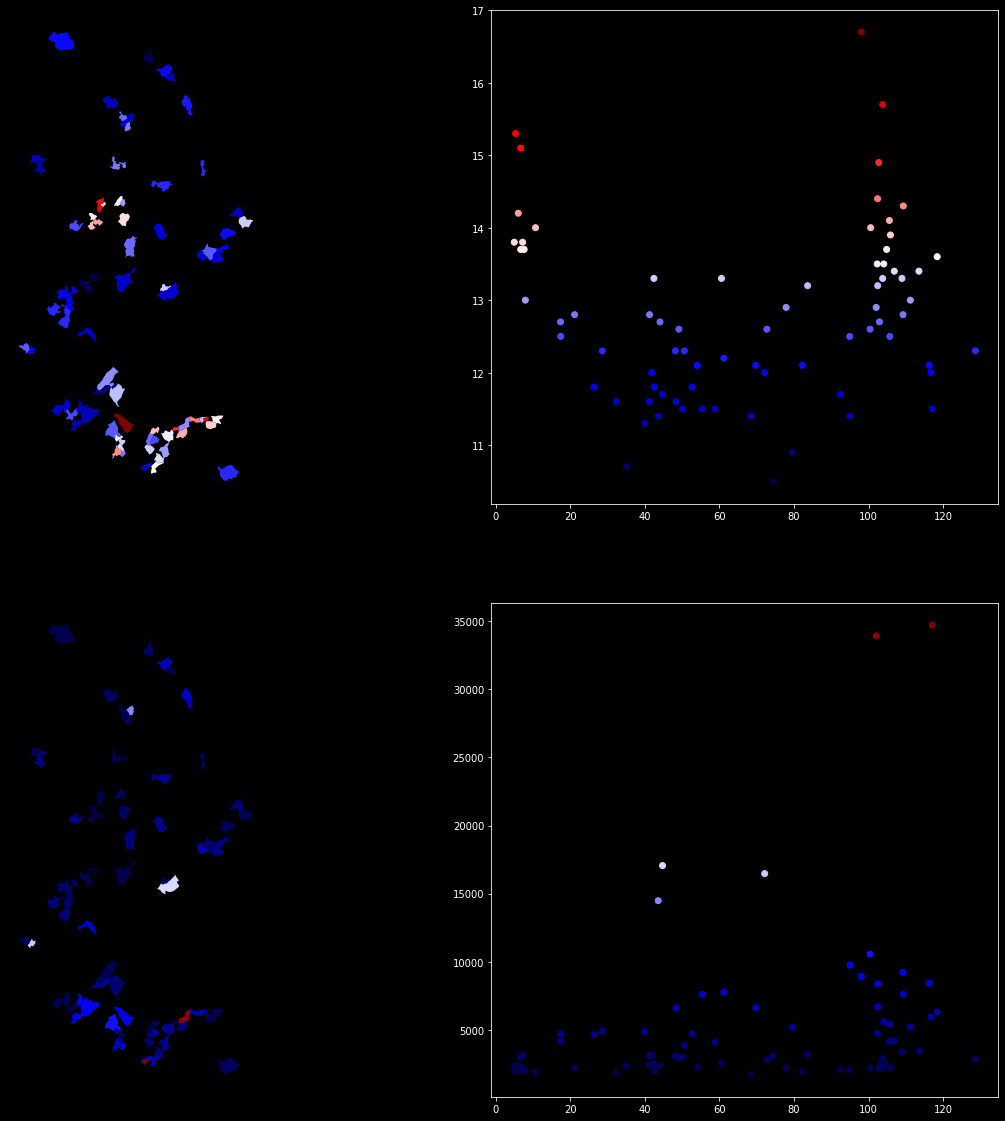

In [10]:
city = "Besançon"

df_temp = df[df["closest_metropolis"] == city]
df_temp = df_temp[df_temp["libgeo"]!= city]
# df_temp = df_temp[df_temp["libgeo"]!= "Villeurbanne"]

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
    df_temp.plot(
        df_temp["net_salary"],
        cmap="seismic",
        ax=axes[0, 0]
    )
    
    df_temp.plot(
        df_temp["population"],
        cmap="seismic",
        ax=axes[1, 0]
    )
    
    axes[0, 1].scatter(
        df_temp["dist_min"],
        df_temp["net_salary"],
        c=df_temp["net_salary"],
        cmap="seismic"
    )
    axes[1, 1].scatter(
        df_temp["dist_min"],
        df_temp["population"],
        c=df_temp["population"],
        cmap="seismic"
    )
    axes[0, 0].axis("off")
    axes[1, 0].axis("off")
    
df_temp.sort_values("population", ascending=False).head()

In [12]:
df_temp.sort_values("population", ascending=False)[["distance_to_montpellier", "distance_to_lyon", "closest_metropolis"]]

,distance_to_montpellier,distance_to_lyon,closest_metropolis
3773,342.200120,118.182978,Besançon
3837,369.252219,143.679548,Besançon
824,414.648463,171.994029,Besançon
1803,365.491585,114.867465,Besançon
3628,480.013510,229.066563,Besançon
...,...,...,...
823,437.778307,187.141027,Besançon
2345,504.724616,252.629434,Besançon
820,428.192279,177.537599,Besançon
814,411.328343,164.540111,Besançon


In [13]:
km_rnd = 5

df["dist_min_rnd"] = (df["dist_min"] / km_rnd).round(0) * km_rnd

In [14]:
df.head()

,codgeo,dep,reg,xcl2154,ycl2154,libgeo,net_salary,population,distance_to_angers,distance_to_avignon,...,distance_to_rouen,distance_to_saintbrieuc,distance_to_saintetienne,distance_to_strasbourg,distance_to_toulouse,distance_to_tours,dist_min,closest_metropolis,geometry,dist_min_rnd
0,01004,01,84,882724.0,6542583.0,Ambérieu-en-Bugey,13.7,13460.0,481.386634,227.390682,...,501.891964,676.571427,95.057840,342.181840,405.256373,390.767916,45.879279,Lyon,"POLYGON ((5.38637 45.93121, 5.38892 45.93320, ...",45.0
1,01007,01,84,882682.0,6548067.0,Ambronay,13.5,2563.0,479.423210,232.793303,...,497.657430,674.146914,98.542071,337.432535,408.804303,388.531487,48.741451,Lyon,"POLYGON ((5.40440 46.00778, 5.39779 46.01009, ...",50.0
2,01014,01,84,906407.0,6580780.0,Arbent,13.5,3281.0,491.910607,269.530737,...,489.484950,682.573590,138.224859,297.286527,448.270671,399.360905,87.894148,Lyon,"POLYGON ((5.71332 46.25667, 5.71983 46.25783, ...",90.0
3,01024,01,84,866161.0,6578890.0,Attignat,12.9,3329.0,453.855171,261.397017,...,463.493880,646.263640,111.697209,320.269383,417.976502,361.838430,63.123904,Lyon,"POLYGON ((5.16256 46.25622, 5.16464 46.25629, ...",65.0
4,01025,01,84,849782.0,6581485.0,Bâgé-la-Ville,13.0,3142.0,437.452133,263.172045,...,450.918833,630.241338,106.570254,327.904742,408.624114,345.563023,61.578670,Lyon,"POLYGON ((4.92091 46.30781, 4.92544 46.31070, ...",60.0


In [15]:
df_rnd = df[["population", "net_salary", "dist_min_rnd", "closest_metropolis"]].copy()
df_rnd["nb_communes"] = 1

df_rnd = df_rnd.groupby(["closest_metropolis", "dist_min_rnd"]).sum().reset_index()

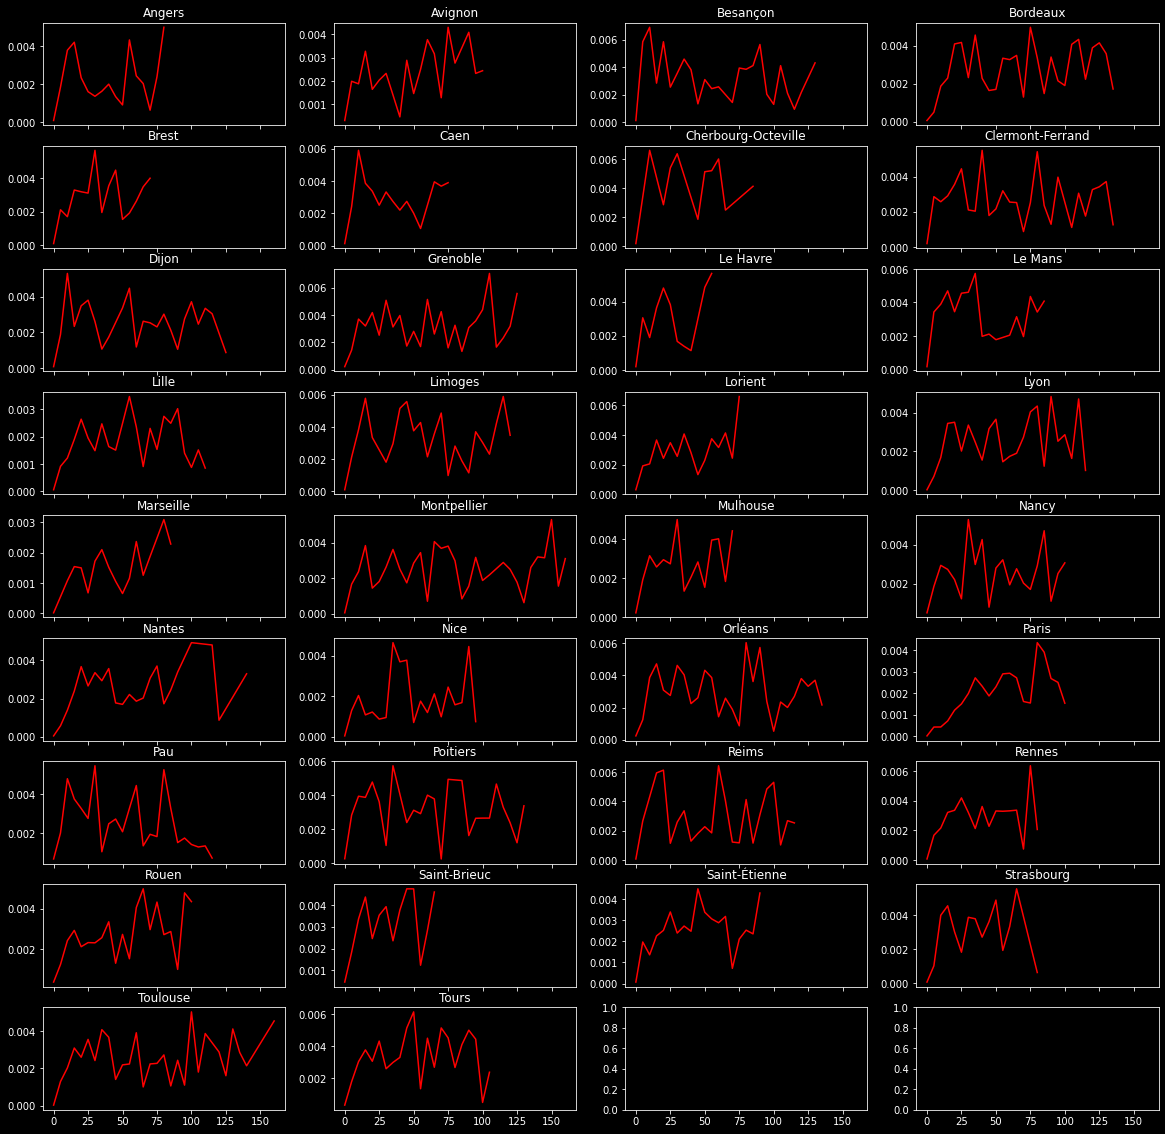

In [16]:
cities = sorted(df_rnd["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df_rnd[df_rnd["closest_metropolis"] == city]
        ax.plot(
            df_temp["dist_min_rnd"],
            df_temp["net_salary"] / df_temp["population"], # / df_temp["net_salary"].max(),
            color="red",
            # alpha=.5
        )
        ax.set_title(city)

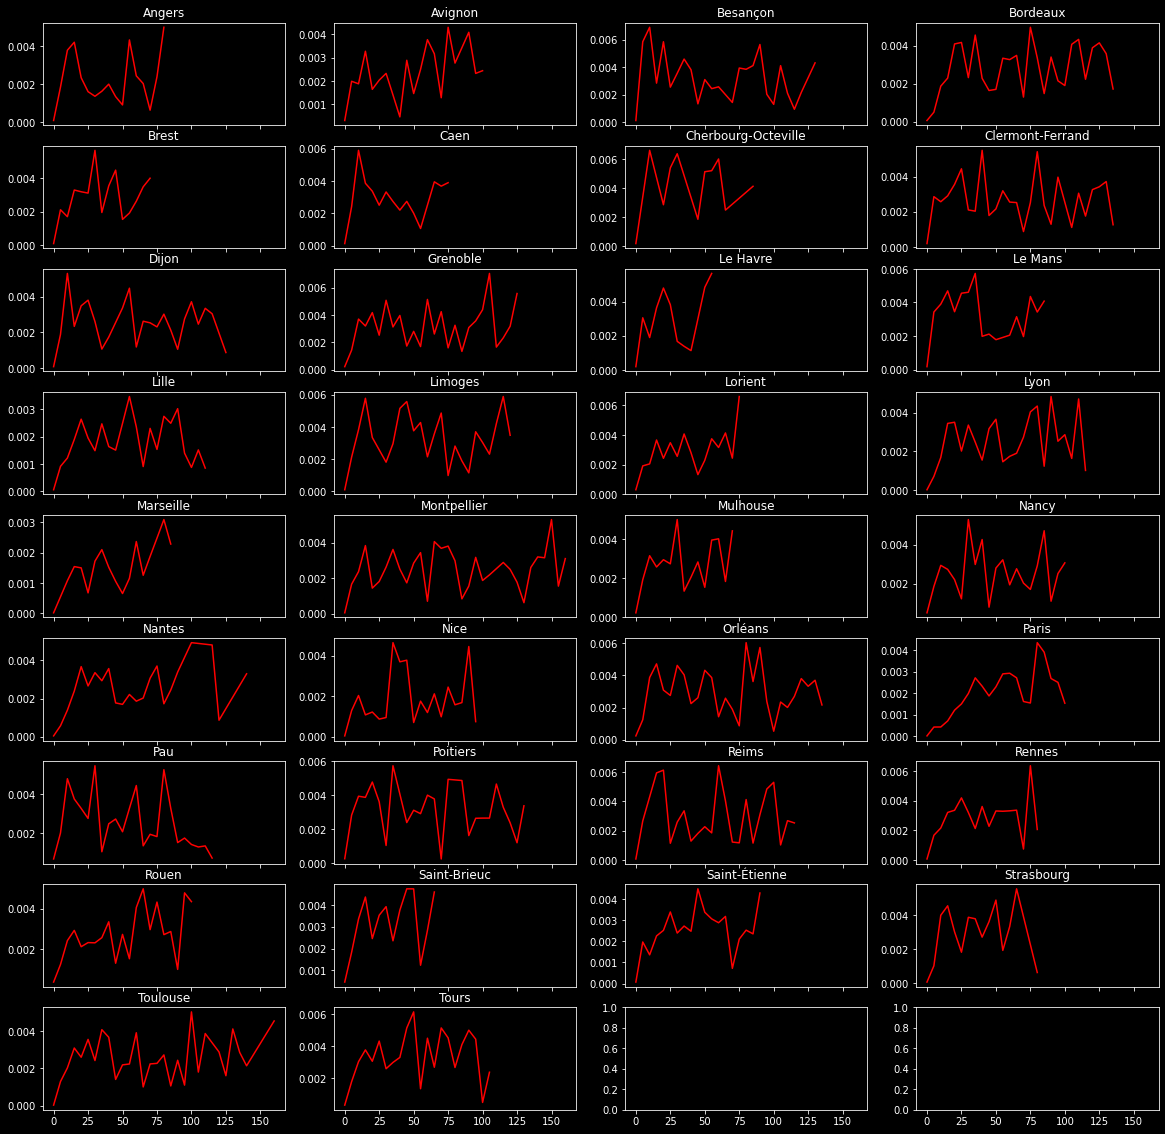

In [17]:
cities = sorted(df_rnd["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df_rnd[df_rnd["closest_metropolis"] == city]
        ax.plot(
            df_temp["dist_min_rnd"],
            df_temp["net_salary"] / df_temp["population"], # / df_temp["net_salary"].max(),
            color="red",
            # alpha=.5
        )
        ax.set_title(city)

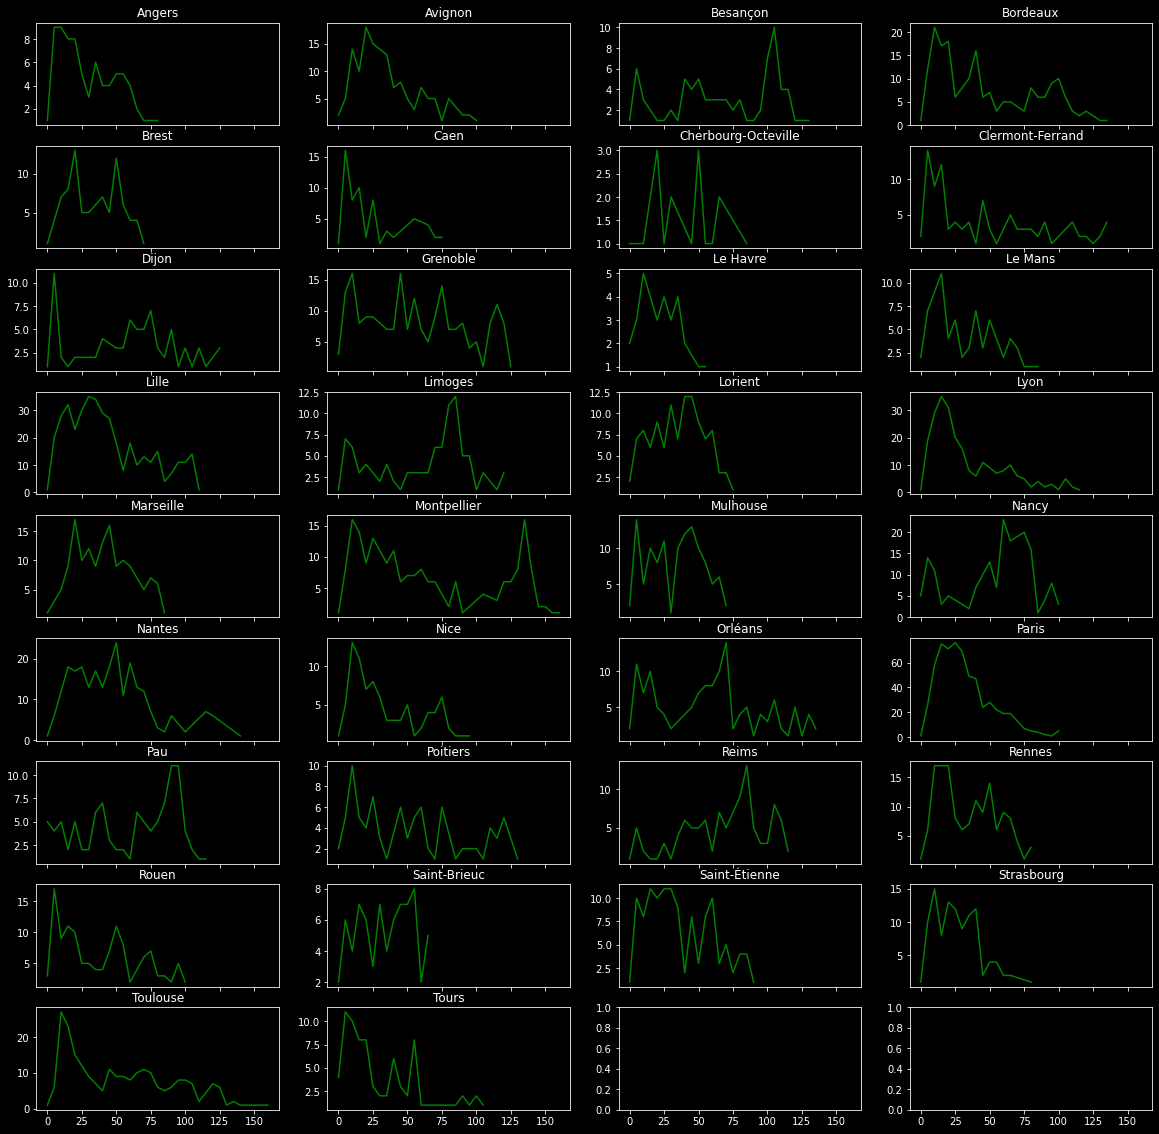

In [18]:
cities = sorted(df_rnd["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df_rnd[df_rnd["closest_metropolis"] == city]
        ax.plot(
            df_temp["dist_min_rnd"],
            df_temp["nb_communes"], # / df_temp["net_salary"].max(),
            color="green",
            # alpha=.5
        )
        ax.set_title(city)

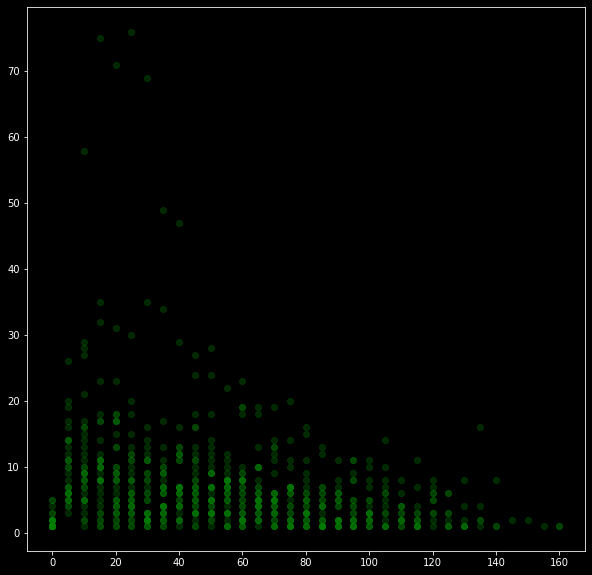

In [19]:
with plt.style.context("dark_background"):
    plt.figure(figsize=(10, 10))
    plt.scatter(df_rnd["dist_min_rnd"], df_rnd["nb_communes"], color="g", alpha=.3)
    plt.show()

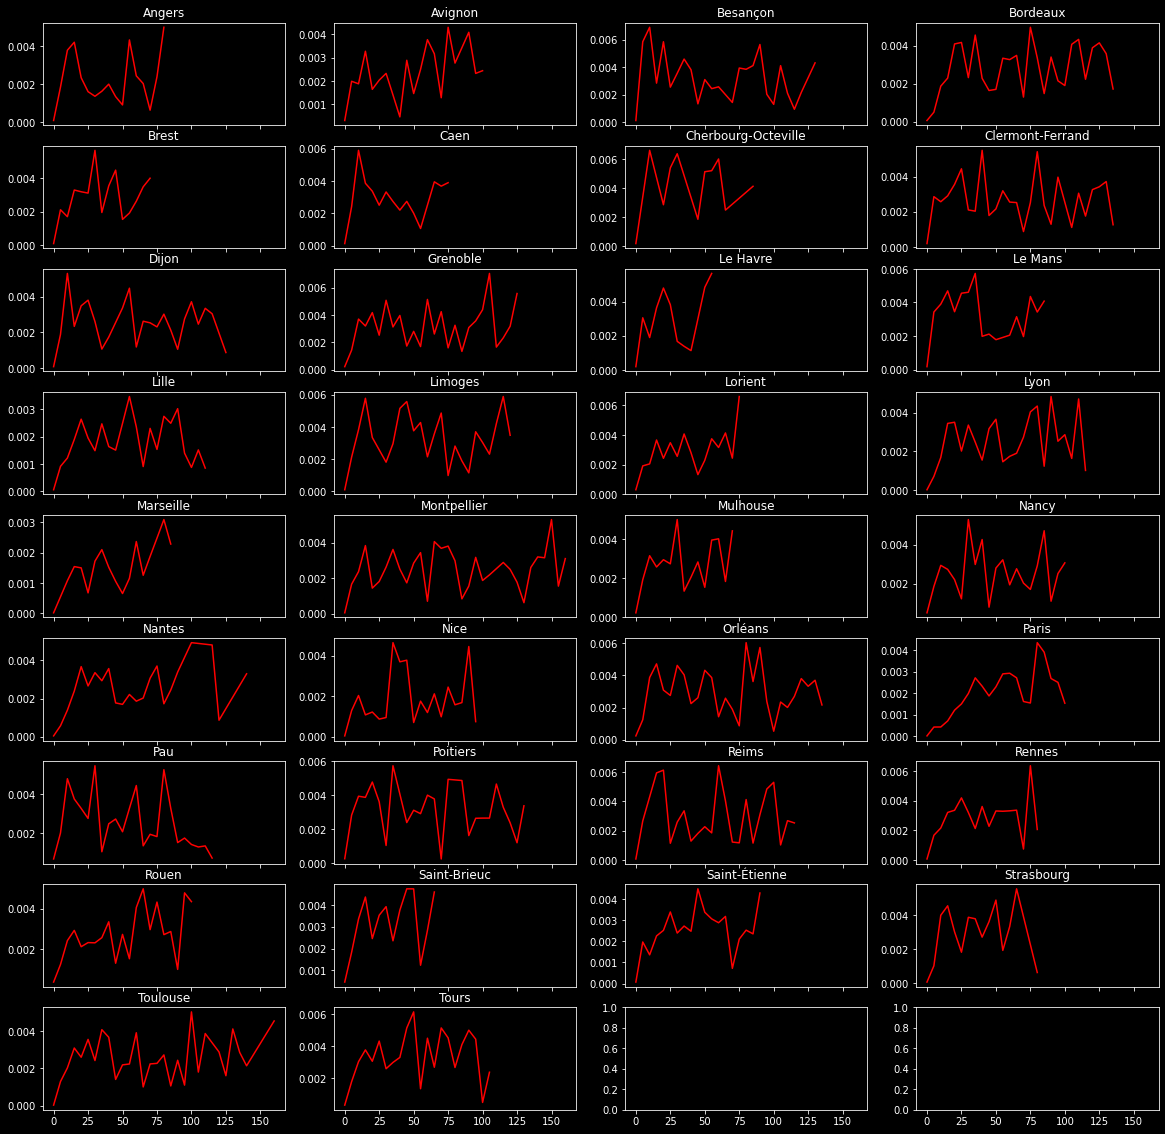

In [20]:
cities = sorted(df_rnd["closest_metropolis"].unique())

ncols = 4
nrows = len(cities) // 4 + (1 if len(cities) % 4 != 0 else 0)

with plt.style.context("dark_background"):
    fig, axes = plt.subplots(ncols=ncols, nrows=nrows, figsize=(20, 20), sharex=True)

    for i, city in enumerate(cities):
        ax = axes[i // 4, i % 4]
        df_temp = df_rnd[df_rnd["closest_metropolis"] == city]
        ax.plot(
            df_temp["dist_min_rnd"],
            df_temp["net_salary"] / df_temp["population"], # / df_temp["net_salary"].max(),
            color="red",
            # alpha=.5
        )
        ax.set_title(city)